In [1]:
#Nur did this, you're welcome <3
#Naman loves y'all ;)  
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## About the project:

The goal of this project is to create a tutorial for Data Science by performing essential DS pipeline steps on real data. We are using Affordable Housing data throughout the USA to show how the Data Science Pipeline can be used to attain useful information and make reasonable comparisions and conclusions. For example, we can find out what racial or age demographic inhibits these affordable apartments and use our historical knowledge to make reasonable assumption about these housing initiatives. This is also a tutorial of how evidence found in the data pipeline can be used conclusively, and our plan is to show that by cleaning, analysing and medling our Affordable housing data in this project.

In [2]:
#!pip install openpyxl

In [3]:
##Creating mapping for each sheet in excel file
LIHTC_data = pd.ExcelFile("2018-LIHTC-Tenant-Tables.xlsx")

sheets = {}
for sheet_name in LIHTC_data.sheet_names:
    sheets[sheet_name] = pd.read_excel("2018-LIHTC-Tenant-Tables.xlsx", sheet_name=sheet_name)

In [4]:
##Dropping columns 
sheets["Table 4"] = sheets["Table 4"].drop(columns="Unnamed: 10")

##Renaming cols to match actual dataset
sheets["Table 4"].iloc[0, 0] = sheets["Table 4"].iloc[1, 0]
sheets["Table 4"].iloc[0, 2:8] = sheets["Table 4"].iloc[1, 2:8]
sheets["Table 4"].iloc[0, 9] = sheets["Table 4"].iloc[1, 9]
sheets["Table 4"].columns = sheets["Table 4"].iloc[0]

##Dropping rows that are irrelevant
sheets["Table 4"] = sheets["Table 4"].drop(sheets["Table 4"].index[57:81])
sheets["Table 4"] = sheets["Table 4"].drop([0,1])

In [5]:
##Getting rid of footnote
sheets["Table 4"] = sheets["Table 4"].replace(to_replace = "New York1", value = "New York")

##Renaming indices
sheets["Table 4"].index = sheets["Table 4"].State.values

##Removing extra whitespaces from column names
sheets["Table 4"].columns = sheets["Table 4"].columns.str.replace('\s{2,}',' ', regex=True)

sheets["Table 4"]

,State,Properties Reported (%),White Alone (%),Black or African American Alone (%),Asian Alone (%),American Indian and Alaska Native Alone (%),Native Hawaiian and Other Pacific Islander Alone (%),Other (including Multiple Race) (%),Hispanic (Any Race) (%),Race or Ethnicity Not Reported (%)
Alabama,Alabama,86.36364,34.45933,63.74529,0.30981,0.20529,0.10451,0.80624,0.35086,0.01866
Alaska,Alaska,100.00000,52.25753,6.68896,4.18060,18.22743,2.17391,0.25084,4.34783,11.87291
Arizona,Arizona,94.71154,35.68655,13.70379,1.21932,7.16837,0.29124,2.15129,33.10811,6.67133
Arkansas,Arkansas,98.32869,42.98514,43.62179,0.37727,0.25937,10.98797,0.56590,1.20255,0.00000
California,California,81.15494,24.97301,18.02942,0.00000,0.84126,0.00000,3.44880,38.61794,14.08958
Colorado,Colorado,84.25605,35.71180,11.20104,1.28039,0.70817,0.11065,3.39224,21.33350,26.26221
Connecticut,Connecticut,91.57895,30.98213,27.23370,0.01745,0.52352,0.00000,1.83582,29.51277,9.89460
Delaware,Delaware,98.42520,24.79282,65.19337,0.69061,0.63536,0.15193,0.95304,7.56906,0.01381
District of Columbia,District of Columbia,71.96262,2.46130,80.92712,0.34789,0.18264,0.07827,0.97408,6.07932,8.94938
Florida,Florida,92.34194,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,100.00000


In [6]:
##Drop cols 
sheets["Table 7"] = sheets["Table 7"].drop(columns = ["Unnamed: 7", "Unnamed: 8", "Unnamed: 9"])

##Renaming cols to match actual dataset
sheets["Table 7"].iloc[0, 0] = sheets["Table 7"].iloc[1, 0]
sheets["Table 7"].iloc[0, 2:4] = sheets["Table 7"].iloc[1, 2:4]
sheets["Table 7"].columns = sheets["Table 7"].iloc[0]

##Dropping rows that are irrelevant
sheets["Table 7"] = sheets["Table 7"].drop(sheets["Table 7"].index[57:66])
sheets["Table 7"] = sheets["Table 7"].drop([0,1])

In [7]:
##Getting rid of footnote
sheets["Table 7"] = sheets["Table 7"].replace(to_replace = "New York2", value = "New York")

##Replacing missing values w/ nan
sheets["Table 7"] = sheets["Table 7"].replace(to_replace = "Data Not Reported", value = np.nan) 

##Renaming indices
sheets["Table 7"].index = sheets["Table 7"].State.values
sheets["Table 7"]

##Removing extra whitespaces from column names
sheets["Table 7"].columns = sheets["Table 7"].columns.str.replace('\s{2,}',' ', regex=True)

##Getting rid of footname in column name
sheets["Table 7"] = sheets["Table 7"].rename(columns={"All Household Members Reported1 (% of Households)": "All Household Members Reported (% of Households)"})

sheets["Table 7"]

,State,All Household Members Reported (% of Households),Head of Household (%),All Reported Members (%),At Least One Member < 18 (%),At Least One Member >= 62 (%),Reported Head of Household >= 62 (%)
Alabama,Alabama,92.45592,99.98210,99.90904,37.55631,31.21141,30.64165
Alaska,Alaska,77.47126,99.15709,99.06250,33.40996,33.10345,32.33716
Arizona,Arizona,99.37811,99.95966,99.81042,45.06522,31.83071,30.57348
Arkansas,Arkansas,99.98844,99.69946,99.59094,36.29638,31.19870,30.71321
California,California,95.26921,99.78389,99.78015,36.73368,41.57440,39.76464
Colorado,Colorado,99.51023,99.67349,99.68896,35.53325,31.35287,30.42955
Connecticut,Connecticut,96.24147,96.67155,97.91855,29.43248,41.41241,40.38396
Delaware,Delaware,100.00000,99.98622,94.60915,39.23649,30.89857,30.44377
District of Columbia,District of Columbia,69.09379,96.33291,97.05082,27.45039,25.42821,24.74911
Florida,Florida,10.17116,NaN,NaN,NaN,NaN,NaN


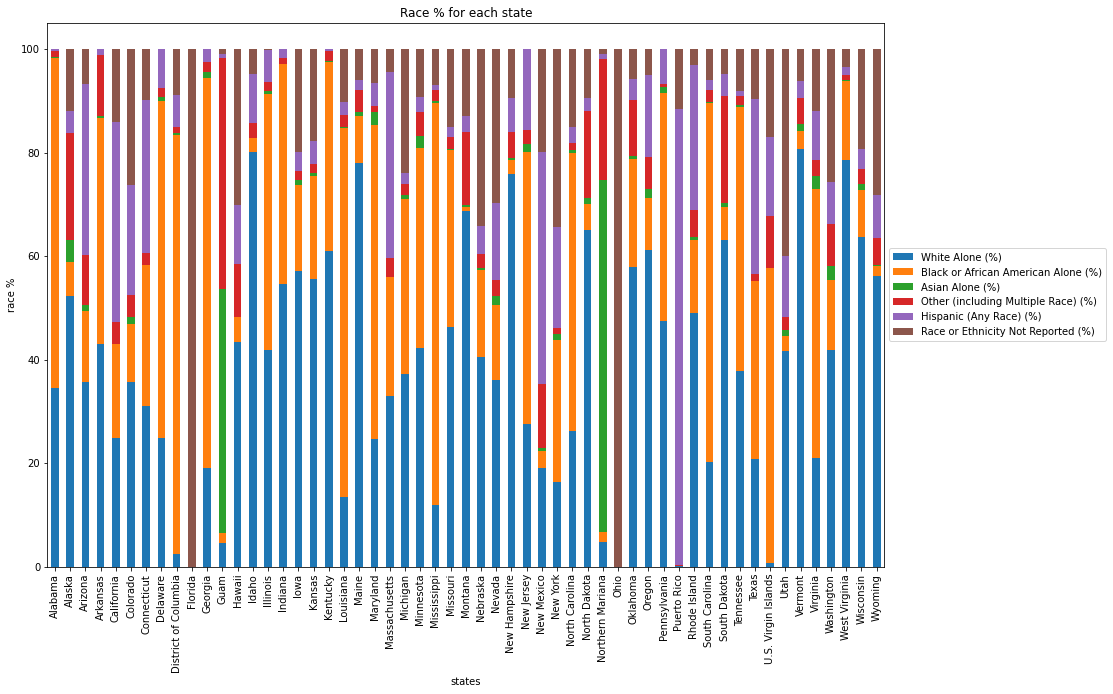

In [8]:
##Creating a new dataframe for plotting
race_data_per_state = sheets["Table 4"]

##Put American Indian & Alaska Native Alone and Native Hawaiian and Other Pacific Islander Alone (%) together w/ Other catergory
race_data_per_state["Other (including Multiple Race) (%)"] = sheets["Table 4"]["American Indian and Alaska Native Alone (%)"] +sheets["Table 4"]["Native Hawaiian and Other Pacific Islander Alone (%)"] + sheets["Table 4"]["Other (including Multiple Race) (%)"]

##Dropping cols that aren't relevant
race_data_per_state = race_data_per_state.drop(columns = ["Properties Reported (%)", "American Indian and Alaska Native Alone (%)", "Native Hawaiian and Other Pacific Islander Alone (%)"])

##Plotting
race_data_per_state.plot.bar(stacked=True, xlabel="states", ylabel="race %", figsize=(15, 10), title= "Race % for each state")

##Moving legend outside of plot for easier viewing
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [9]:
##2018-LIHTC table 2, 4, 6, 7, 8, 12
##State 2018 table

##sam: 2018-LIHTC table 2, 6 (X)
##nur: 2018-LIHTC table 4, 7 (X)
##elliot: 2018-LIHTC table 8, 12 (X)
##Naman: state 2018 table